<a href="https://colab.research.google.com/github/TaymoorAk/SMS-Classification/blob/master/Copy_of_Arabic_Sentimental_Analysis(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#https://www.kaggle.com/mksaad/arabic-sentiment-analysis-in-tweets-nb-bow
#https://github.com/saobou/arabic-text-preprocessing/blob/master/Preprocess.ipynb
import numpy as np 
import pandas as pd

In [0]:
import nltk
from nltk import NaiveBayesClassifier
from nltk.metrics.scores import f_measure, precision, recall
import collections
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [0]:
pos_dataset = pd.read_csv('train_Arabic_tweets_positive_20190413.tsv',sep='\t', encoding='utf-8')
pos_test = pd.read_csv('test_Arabic_tweets_positive_20190413.tsv', sep='\t', encoding='utf-8')

In [0]:
neg_dataset = pd.read_csv('train_Arabic_tweets_negative_20190413.tsv',sep='\t', encoding="utf-8")
neg_test = pd.read_csv('test_Arabic_tweets_negative_20190413.tsv',sep='\t', encoding='utf-8')

In [5]:
neg_dataset.head

<bound method NDFrame.head of       Sentiment                                               Text
0           neg  اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...
1           neg  توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
2           neg  #الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
3           neg  نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...
4           neg                             الدودو جايه تكمل علي 💔
...         ...                                                ...
22509       neg  كيف ترى أورانوس لو كان يقع مكان القمر ؟ 💙💙 كوك...
22510       neg                                  احسدك على الايم 💔
22511       neg                            لأول مرة ما بنكون سوا 💔
22512       neg                                 بقله ليش يا واطي 🤔
22513       neg  قد طال صبري في النوى إذ تركتني كئيبا ؛ غريبا ب...

[22514 rows x 2 columns]>

In [6]:
pos_dataset['Text'][1]

'وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال في روحك أماالمنبهرون بالمظا…'

In [0]:
pos = pd.DataFrame(columns=['Text','Label'])

In [0]:
neg = pd.DataFrame(columns=['Text','Label'])

In [9]:
!pip install googletrans
from googletrans import Translator
translator = Translator()
translated = translator.translate(pos_dataset['Text'][1], src='ar', dest='en')
print(translated.text)

  Created wheel for googletrans: filename=googletrans-2.4.0-cp36-none-any.whl size=15777 sha256=5b531f164ed825f37cc0b33745e97e491ecc785783e57774828ed2f0644931c5
  Stored in directory: /root/.cache/pip/wheels/50/d6/e7/a8efd5f2427d5eb258070048718fa56ee5ac57fd6f53505f95
Successfully built googletrans
In the end, it will not stay Ahdala saw beauty in your soul Omaalmenbhron Balmaza ...


In [0]:
pos_tweets=[]
neg_tweets=[]
pos_sent=[]
neg_sent=[]
for i in range(len(pos_dataset)):
  pos_tweets.append(pos_dataset['Text'][i])
  pos_sent.append(1)

for i in range(len(pos_test)):
   pos_tweets.append(pos_test['Text'][i])
   pos_sent.append(1)

for i in range(len(neg_dataset)):
  neg_tweets.append(neg_dataset['Text'][i])
  neg_sent.append(0)

for i in range(len(neg_test)):
  neg_tweets.append(neg_test['Text'][i])
  neg_sent.append(0)

In [11]:
pos_tweets[1]

'وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال في روحك أماالمنبهرون بالمظا…'

In [12]:
neg_tweets[1]

'توقعت اذا جات داريا بشوفهم كاملين بس لي للحين احس فيه احد ناقصهم 💔 #Avlu'

In [0]:
text=[]
Label=[]
for tweet in pos_tweets:
  text.append(tweet)
  Label.append(1)
for tweet in neg_tweets:
  text.append(tweet)
  Label.append(0)

In [0]:
data = pd.DataFrame(columns=['Text'])

In [0]:
data['Text'] = text

In [16]:
data

,Text
0,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...
1,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
2,من الخير نفسه 💛
3,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...
4,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...
...,...
56790,النوم وانت مكسور ده احساس غبي اللي هو مش قادر ...
56791,استشهاد_الامام_كاظم_الغيظ السلام على المعذب في...
56792,انا كنت اكل الصحن بكبره 😐
56793,قولوا لي ايش تشوفوا .. مع ملاحظة التلطف لأنه ا...


In [18]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
for sentence in data['Text']:
  word_tokenize(sentence)
 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
data

,Text
0,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...
1,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
2,من الخير نفسه 💛
3,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...
4,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...
...,...
56790,النوم وانت مكسور ده احساس غبي اللي هو مش قادر ...
56791,استشهاد_الامام_كاظم_الغيظ السلام على المعذب في...
56792,انا كنت اكل الصحن بكبره 😐
56793,قولوا لي ايش تشوفوا .. مع ملاحظة التلطف لأنه ا...


### Arabic text cleaning

In [20]:
!pip install Tashaphyne
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from textblob import TextBlob
import re

from tashaphyne.stemming import ArabicLightStemmer
from nltk.stem.isri import ISRIStemmer

stops = set(stopwords.words("arabic"))
stop_word_comp = {"،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان"}
ArListem = ArabicLightStemmer()


     |████████████████████████████████| 245kB 7.1MB/s 
     |████████████████████████████████| 102kB 11.0MB/s 
  Created wheel for pyarabic: filename=PyArabic-0.6.6-cp36-none-any.whl size=106208 sha256=b8fdd95b2fb227768eefb5aef400ebfc99998b149015d751eea206fb16f2a7a5
  Stored in directory: /root/.cache/pip/wheels/34/b5/2d/668d567e8c2b6f10309dbfaba5bfef6ea0b1c0f9f6fb37078f
Successfully built pyarabic
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Stemming

In [0]:
# def to_arabic(text):
#     return ds.transliterate(text)

def stem(text):
    zen = TextBlob(text)
    words = zen.words
    cleaned = list()
    for w in words:
        ArListem.light_stem(w)
        cleaned.append(ArListem.get_root())
    return " ".join(cleaned)

#### Normalizing Text

In [0]:
import pyarabic.araby as araby
def normalizeArabic(text):
    text = text.strip()
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation
    return araby.strip_tashkeel(text)

#### Stop Words Removal

In [0]:
def remove_stop_words(text):
    zen = TextBlob(text)
    words = zen.words
    return " ".join([w for w in words if not w in stops and not w in stop_word_comp and len(w) >= 2])

### Dealing with Hashtags in string

In [0]:
def split_hashtag_to_words(tag):
    tag = tag.replace('#','')
    tags = tag.split('_')
    if len(tags) > 1 :
        
        return tags
    pattern = re.compile(r"[A-Z][a-z]+|\d+|[A-Z]+(?![a-z])")
    return pattern.findall(tag)

def clean_hashtag(text):
    words = text.split()
    text = list()
    for word in words:
        if is_hashtag(word):
            text.extend(extract_hashtag(word))
        else:
            text.append(word)
    return " ".join(text)
def is_hashtag(word):
    if word.startswith("#"):
        return True
    else:
        return False
def extract_hashtag(text):
    
    hash_list = ([re.sub(r"(\W+)$", "", i) for i in text.split() if i.startswith("#")])
    word_list = []
    for word in hash_list :
        word_list.extend(split_hashtag_to_words(word))
    return word_list

### MISC

In [0]:
def misc():
  import re
  import pyarabic.araby as araby

  import warnings
  warnings.filterwarnings("ignore", category=DeprecationWarning)

  # test sample
  tweet1 = u'جهود تُبذل عامًا بعد عام تعبّر عن ترابط الجسد الواحد لخدمة ضيوف الرحمن؛ تطبيق ترجمان الفائز في #هاكاثون_الحج العام الماضي، ينطلق اليوم ليشارك الحجاج أيامهم الروحانية ويساعدهم في ترجمة اللوح الإرشادية في منطقة الحرم دون الحاجة إلى انترنت @reem. #حج_ذكي'



  # removes usernames inside a tweet text caused by to mentions or reply tweets
  def remove_usernames(input_txt, pattern):
      r = re.findall(pattern, input_txt)
      for i in r:
          input_txt = re.sub(i, '', input_txt)

      return input_txt

  # removes arabic letters tashkeel like (ِ ًٍ ٌ  ّ ْ )
  def remove_tashkeel(input_txt):
      return araby.strip_tashkeel(input_txt)

  # removes a decorative letter (ـ) which has no affect on words meaning
  def remove_tatweel(input_txt):
      return araby.strip_tatweel(input_txt)

  # normalizes the different forms of the letter hamza (ئ ؤ) into a single form (ء)
  def normalize_hamza(input_txt):
      r = re.findall(u'ئ',input_txt);
      e = re.findall(u'ؤ',input_txt);
      for i in r:
          input_txt= re.sub(i, u'ء', input_txt)
      for i in e:
          input_txt= re.sub(i, u'ء', input_txt)
      return input_txt

  # normalizes the different forms of the letter alef (آ أ إ) into a single form (ا)
  def normalize_alef(input_txt):
      r = re.findall(u'أ',input_txt);
      e = re.findall(u'إ',input_txt);
      o = re.findall(u'آ', input_txt);
      for i in r:
          input_txt= re.sub(i, u'ا', input_txt)
      for i in e:
          input_txt= re.sub(i, u'ا', input_txt)
      for i in o:
          input_txt= re.sub(i, u'ا', input_txt)
      return input_txt

  # normalizes the different forms of the letter yeh (ي ى) into a single form (ى)
  def normalize_yeh(input_txt):
      r = re.findall(u'ي', input_txt)
      for i in r:
          input_txt = re.sub(i, u'ى', input_txt)
      return input_txt

  # normalizes the different forms of the letter heh (ه ة) into a single form (ة)
  def normalize_heh(input_txt):
      r = re.findall(u'ه', input_txt)
      for i in r:
          input_txt = re.sub(i, u'ة', input_txt)
      return input_txt

  # combining all preprocessing functions together for testing samples
  def full_preprocessing_steps(tweet):

      print("Tweet before preprocessing: " + tweet)

      usernames_free = remove_usernames(tweet,  "@[\w]*")
      tashkeel_free = remove_tashkeel(usernames_free)
      tatweel_free = remove_tatweel(tashkeel_free)
      hamza_normalized = normalize_hamza(tatweel_free)
      alef_normalized = normalize_alef(hamza_normalized)
      yeh_normalized = normalize_yeh(alef_normalized)
      heh_normalized = normalize_heh(yeh_normalized)

      print("Tweet after preprocessing: " + heh_normalized)

  full_preprocessing_steps(tweet1)

In [0]:
def clean_tweet(text):
    text = re.sub('#\d+K\d+', ' ', text)  # years like 2K19
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('@[^\s]+',' ',text)
    text = clean_hashtag(text)
    # text = clean_emoji(text)
    return text

#### DEMOJI


In [0]:
def demoji(sentence):
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  sentence = emoji_pattern.sub(r'', sentence)
  return sentence

#### Cleaning Data

In [0]:
def clean_text(text):
    ## Clean for tweets
    text = clean_tweet(text)
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)  # remove punctuation
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    ## Remove Emojis
    text = demoji(text)
    ## Convert text to lowercases
    text = text.lower()
    ## Arabisy the text
    # text = to_arabic(text)
    ## Remove stop words
    text = remove_stop_words(text)
    ## Remove numbers
    text = re.sub("\d+", " ", text)
    ## Remove Tashkeel
    text = normalizeArabic(text)
    #text = re.sub('\W+', ' ', text)
    text = re.sub('[A-Za-z]+',' ',text)
    text = re.sub(r'\\u[A-Za-z0-9\\]+',' ',text)
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    #Stemming
    #text = stem(text)
    return text

In [0]:
data['Text'] = data['Text'].apply(lambda x:clean_text(x))

In [29]:
data['Text'][1]

'النهايه يبقيٰ معك احدالا رايٰ الجمال روحك اماالمنبهرون بالمظا…'

#### Common Words Removal

In [0]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:12]
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

#### Rare words removal

In [0]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[-50:]
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [0]:
data['Labels'] = Label

In [33]:
data

,Text,Labels
0,يتحول نود نقوله دعاء لله تبحثوا فينا اننا مكسو...,1
1,النهايه يبقيٰ معك احدالا رايٰ الجمال روحك اماا...,1
2,,1
3,زلزل الملعب نصرنا بيلعب كن عالي الهمه ترضي بغي...,1
4,الشيء الوحيد وصلوا للعالميه المسيار تري كانوا ...,1
...,...,...
56790,النوم وانت مكسور ده احساس غبي مش قادر تنام لاز...,0
56791,استشهاد الامام كاظم الغيظ السلام المعذب قعر ال...,0
56792,كنت اكل الصحن بكبره,0
56793,قولوا ايش تشوفوا ملاحظه التلطف لانه المود,0


### Final Cleaning and Preparing Dataset

In [0]:
# def avg_word(sentence):
#     words = sentence.split()
#     if len(words) == 0:
#         return 0
#     return (sum(len(word) for word in words)/len(words))

# data['word_count'] = data['Text'].apply(lambda x: len(str(x).split(" ")))
# data['char_count'] = data['Text'].str.len() ## this also includes spaces
# data['avg_char_per_word'] = data['Text'].apply(lambda x: avg_word(x))
# stop = stopwords.words('arabic')
# data['stopwords'] = data['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
# data = data.sort_values(by='word_count',ascending=[0])
# final = []
# for index, row in data.iterrows():
#     if len(row['Text'].split()) > 3:
#         final.append([row['Text'],row['Labels']])
# df = pd.DataFrame(final)
# df.columns = ['Text','Sentiment']
# df.to_csv('final_data.csv',index=False)
def deEmojify(data):
  for sentence in data["Text"]:
    sentence.encode('ascii', 'ignore').decode('ascii')
  return data

deEmojify(data)

In [34]:
from sklearn.utils import shuffle
data = shuffle(data)
data.reset_index()
data.head

<bound method NDFrame.head of                                                     Text  Labels
27915                                       سخيف الصراحه       1
36308  منبر فلسطين تعلم ازعاج الناءم اثناء نومه يءدي ...       0
5816                       تتمسك لاشيءاء حاولت لتخلي عنک       1
14449  القوه لمن قسي عليهم الليل الحب عوضا عمن خذل ال...       1
49127                            ربنا معاك حبيبي الي جاي       0
...                                                  ...     ...
10688  لعبه لاكثر وهذا سبب تحول اعلامه لدعم منافسين م...       1
26092                              جعلك ماتفقد غالي عزيز       1
21323                                              بنقول       1
23914                                       مبعدش ياجيمي       1
42451  اكلك انتي خدودك الحين دامك ماتبيهم جيبيهم تكفي...       0

[56795 rows x 2 columns]>

In [35]:
from sklearn.model_selection import train_test_split
data.dropna()
X_train, X_test, Y_train, Y_test = train_test_split(data['Text'],data['Labels'], test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(51115,) (51115,)
(5680,) (5680,)


### Translated

In [0]:
!pip install googletrans
from googletrans import Translator
translator = Translator()


In [0]:
d = ''' بلازما فيتامين لعلاج تساقط الشعر 
+ميزو لتغذية الشعر فقط800RS

زراعة الاسنان الامريكية فقط3600RS
للحجز 0125108000 '''
translated = translator.translate(d, src='ar', dest='en')
print(translated.text)

In [0]:
# from keras.preprocessing.text import Tokenizer
MAX_NB_WORDS = 60000
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 100

In [0]:
# tokenizer = Tokenizer(num_words=MAX_NB_WORDS,lower=False)
# tokenizer.fit_on_texts(np.concatenate((X_train, X_test)).ravel())

In [0]:
Y_train = pd.get_dummies(Y_train).values
Y_test = pd.get_dummies(Y_test).values


In [0]:
Y_train[1]

In [0]:
# from keras.preprocessing.sequence import pad_sequences
# X_train_tokenized = pad_sequences(tokenizer.texts_to_sequences(X_train.values.ravel()),maxlen=MAX_SEQUENCE_LENGTH)
# X_test_tokenized = pad_sequences(tokenizer.texts_to_sequences(X_test.values.ravel()),maxlen=MAX_SEQUENCE_LENGTH)

In [0]:
# X_train_tokenized.shape

In [0]:
# X_train_tokenized[1]

In [0]:
# from sklearn import decomposition
# pca = decomposition.PCA(n_components=100)
# pca.fit(X_train_tokenized)
# X_train_tokenized = pca.transform(X_train_tokenized)

In [0]:
# x_train[1]

In [38]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random
from sklearn.random_projection import sparse_random_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(max_features=MAX_SEQUENCE_LENGTH, encoding='utf-8',stop_words=["،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان"]) #,
X_train = tvec.fit_transform(X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'آها', 'ؤلاء', 'إل', 'إليك', 'إليكن', 'إم', 'إيه', 'اء', 'ات', 'اتان', 'ارتد', 'بخ', 'بس', 'تان', 'تبد', 'تحو', 'حي', 'ذار', 'ذان', 'صه', 'ظل', 'عل', 'قط', 'كأن', 'كأي', 'مكان', 'مكانكن', 'هاك', 'هب', 'هلم', 'واها', 'وراء', 'ويكأن'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [39]:
print(X_train[1])

  (0, 38)	0.6190554352452728
  (0, 36)	0.5381626988728936
  (0, 3)	0.5719713958189945


In [40]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Dropout , GRU
from keras.callbacks import ModelCheckpoint, EarlyStopping
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 25
batch_size = 64

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 100)           6000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 50, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 6,080,602
Trainable params: 6,080,602
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 46003 samples, validate on 5112 samples
Epoch 1/25





46003/46003 [==============================] - 59s 1ms/step - loss: 0.6929 - acc: 0.5049 - val_loss: 0.6926 - val_acc: 0.5023
Epoch 2/25
46003/46003 [==============================] - 49s 1ms/step - loss: 0.6920 - acc: 0.5095 - val_loss: 0.6919 - val_acc: 0.5051
Epoch 3/25
46003/46003 [==============================] - 49s 1ms/step - loss: 0.6913 - acc: 0.5091 - val_loss: 0.6902 - val_acc: 0.5123
Epoch 4/25
46003/46003 [==============================] - 49s 1ms/step - loss: 0.6897 - acc: 0.5153 - val_loss: 0.6893 - val_acc: 0.5180
Epoch 5/25
46003/46003 [==============================] - 49s 1ms/step - loss: 0.6887 - acc: 0.5168 - val_loss: 0.6891 - val_acc: 0.5176
Epoch 6/25
46003/46003 [==============================] - 49s 1ms/step - loss: 0.6882 - acc: 0.5200 - val_loss: 0.6884 - val_acc: 0.5176
Epoch 7/25
46003/46003 [===

In [43]:
X_test = tvec.transform(X_test)
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

5680/5680 [==============================] - 8s 1ms/step
Test set
  Loss: 0.684
  Accuracy: 0.536


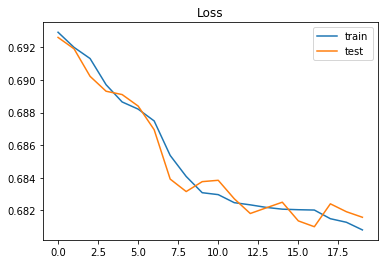

In [44]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

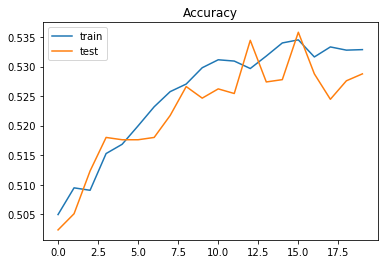

In [45]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [0]:
def predictor(str):
  new_tweet = [str]
  seq = tvec.transform(new_tweet)
  pred = model.predict(seq)
  if(np.argmax(pred)) == 0:
    return "Negative"
  else:
    return "Positive"

In [47]:
predictor('هذا مرهق. يلوم الديمقراطيون: روسيا تويتر موقع يوتيوب كومي جيل شتاين ويكيليكس Antifa ألفيين لكن الحزب لن ينظر إلى المرآة ويدرك أنه فشل تمامًا في تشكيل تحد ذي معنى للظلم الاجتماعي والاقتصادي  وبالتالي فقد الدعم.')

'Positive'